In [1]:

# Imports!

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import re
import numpy as np


In [2]:

# Dataset Load!

df = pd.read_csv('../data/kaggle_dataset.csv')

# Display the first 5 rows of the DataFrame
print("First 5 rows of the dataset:")
print(df.head())

# Get the dimensions (rows, columns) of the DataFrame
print("\nDataFrame shape (rows, columns):", df.shape)

# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Get data types of each column
print("\nData types of each column:")
print(df.dtypes)


First 5 rows of the dataset:
   Unnamed: 0  id                                               text  label  \
0           0   1        It always seems impossible until it's done.  human   
1           1   2     She finished the challenging crossword puzzle.     ai   
2           2   3  You can't use up creativity. The more you use,...  human   
3           3   4  The journey of a thousand miles begins with a ...  human   
4           4   5  Life is short, and it is up to you to make it ...  human   

   word_count  char_count  avg_word_length  punctuation_density  
0           7          43         5.285714             0.142857  
1           6          46         6.833333             0.166667  
2          13          65         4.076923             0.307692  
3          11          58         4.363636             0.090909  
4          13          52         3.076923             0.153846  

DataFrame shape (rows, columns): (1299, 8)

Missing values in each column:
Unnamed: 0             0

In [3]:

#Convert object to integer for label columns!

df['label'] = df['label'].replace({'human': 1, 'ai': 0})
df


,Unnamed: 0,id,text,label,word_count,char_count,avg_word_length,punctuation_density
0,0,1,It always seems impossible until it's done.,1,7,43,5.285714,0.142857
1,1,2,She finished the challenging crossword puzzle.,0,6,46,6.833333,0.166667
2,2,3,"You can't use up creativity. The more you use,...",1,13,65,4.076923,0.307692
3,3,4,The journey of a thousand miles begins with a ...,1,11,58,4.363636,0.090909
4,4,5,"Life is short, and it is up to you to make it ...",1,13,52,3.076923,0.153846
...,...,...,...,...,...,...,...,...
1294,1294,1295,The smart thermostat adjusted the temperature ...,0,7,60,7.714286,0.142857
1295,1295,1296,Do your homework before watching TV.,1,6,36,5.166667,0.166667
1296,1296,1297,Life is a long lesson in humility.,1,7,34,4.000000,0.142857
1297,1297,1298,The neural network learned to recognize differ...,0,8,58,6.375000,0.125000


In [4]:

#analyze the text column!
# Create a new column for the number of words in each text
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Create a new column for the number of characters in each text
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

# Display descriptive statistics for these new columns
print("\nDescriptive statistics for text length:")
print(df[['word_count', 'char_count']].describe())



Descriptive statistics for text length:
        word_count   char_count
count  1299.000000  1299.000000
mean      9.844496    55.146266
std       4.086751    20.850562
min       2.000000     6.000000
25%       8.000000    43.000000
50%       9.000000    54.000000
75%      11.000000    65.000000
max      66.000000   343.000000



Counts of each class in the 'label' column:
label
1    651
0    648
Name: count, dtype: int64


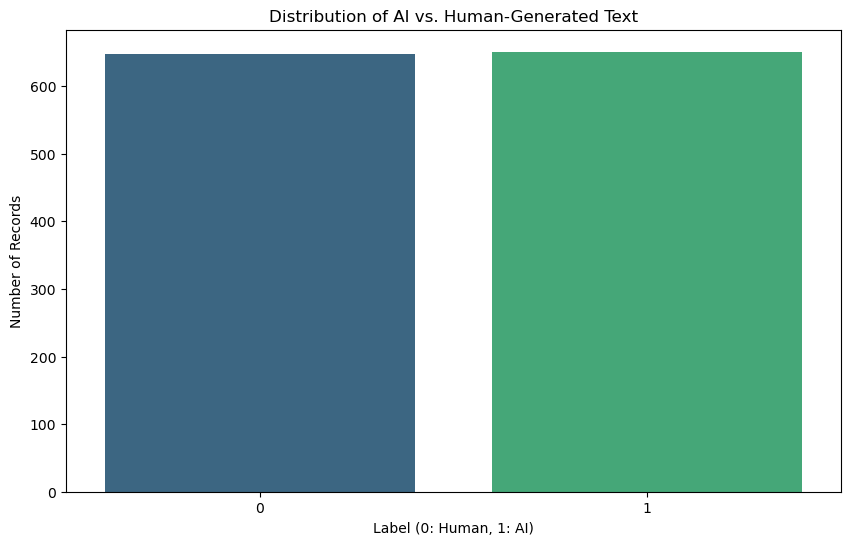

In [8]:

#label column to check class balance
# Count the number of records for each class
label_counts = df['label'].value_counts()
print("\nCounts of each class in the 'label' column:")
print(label_counts)

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of AI vs. Human-Generated Text')
plt.xlabel('Label (0: Human, 1: AI)')
plt.ylabel('Number of Records')
plt.show()


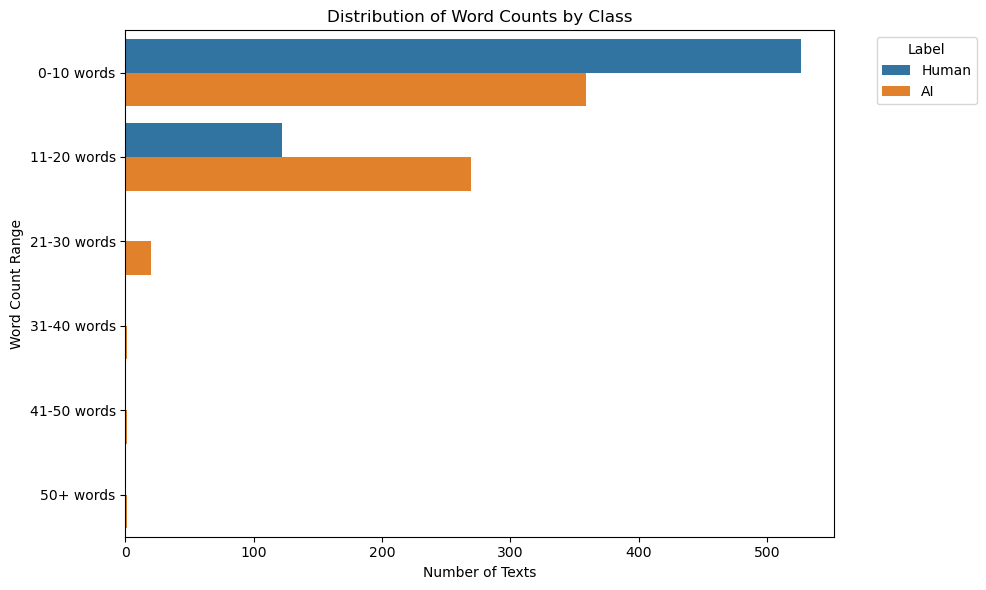

In [6]:

#Visualization of Word Count by Class
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Bin the word counts into categories
bins = [0, 10, 20, 30, 40, 50, float('inf')]
labels = ['0-10 words', '11-20 words', '21-30 words', '31-40 words', '41-50 words', '50+ words']
df['word_count_bin'] = pd.cut(df['word_count'], bins=bins, labels=labels, right=True)

# Count the number of texts in each bin for each label
plot_df = df.groupby(['word_count_bin', 'label']).size().unstack(fill_value=0).reset_index()
plot_df.columns = ['word_count_bin', 'Human', 'AI']
plot_df = plot_df.melt(id_vars='word_count_bin', var_name='label', value_name='count')

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='count',
    y='word_count_bin',
    hue='label',
    data=plot_df,
    orient='h'
)
plt.title('Distribution of Word Counts by Class')
plt.xlabel('Number of Texts')
plt.ylabel('Word Count Range')
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('word_count_distribution_horizontal_bar_chart.png')


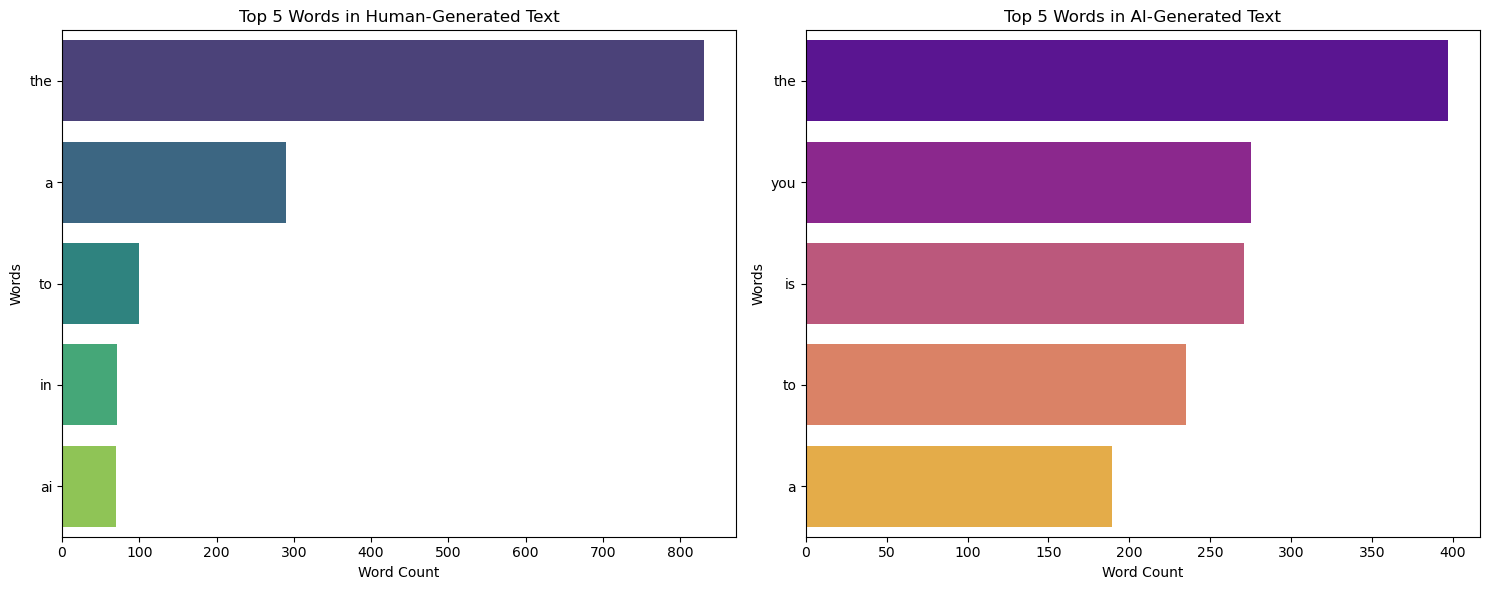

In [7]:

# 1. define function to get top n words ---
def get_top_n_words_df(df, n=5):
    all_text = ' '.join(df['text'])
    words = re.findall(r'\b\w+\b', all_text.lower())
    word_counts = Counter(words)
    top_words = word_counts.most_common(n)
    return pd.DataFrame(top_words, columns=['word', 'count'])

# 2. function to get top words ---
def get_top_n_words_df(df, n=5):
    all_text = ' '.join(df['text'])
    words = re.findall(r'\b\w+\b', all_text.lower())
    word_counts = Counter(words)
    top_words = word_counts.most_common(n)
    return pd.DataFrame(top_words, columns=['word', 'count'])

# 3. Separate the DataFrame by label ---
df_human = df[df['label'] == 0].copy()
df_ai = df[df['label'] == 1].copy()

# 4. Get top words and visuals ---
top_human_words_df = get_top_n_words_df(df_human, n=5)
top_ai_words_df = get_top_n_words_df(df_ai, n=5)

# visuals
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Human-generated texts
sns.barplot(x='count', y='word', data=top_human_words_df, ax=axes[0], palette='viridis')
axes[0].set_title('Top 5 Words in Human-Generated Text')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Words')

# Plot for AI-generated texts
sns.barplot(x='count', y='word', data=top_ai_words_df, ax=axes[1], palette='plasma')
axes[1].set_title('Top 5 Words in AI-Generated Text')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Words')

plt.tight_layout()
plt.show()